# A tutorial for using the climate impacts metrics tool (CIMTool)

## 0. Preliminary

Welcome to the climate impacts metrics tool. This tutorial has been written to give the user some background knowledge of CIMTool, how to use it appropriately and understand what is going on behind the scenes when we run CIMTool through the command line / your favourite IDE. The author is going to assume that the reader is somewhat familiar with how to use an ipython/jupyter notebook, but in case not, one can run a block of code hitting: SHIFT + ENTER. Further information and help can be found online. For example see this [tutorial](http://opentechschool.github.io/python-data-intro/core/notebook.html). The author also assumes some familiarity with basic pythonic language, (e.g. numbering, lists, functions, classes, etc.). Useful links for using classes in python are given at relevant places during the tutorial. The author further assumes that the user will have received some (basic) help/training with using iris, further help for this can be found on this [website](http://scitools.org.uk/iris/docs/latest/index.html). 

Any questions or comments regarding this tutorial (or CIMTool itself) can be sent to: **joshua.b.bevan@gmail.com**

NOTE: This tutorial does not go into detail about how to run CIMTool via a Rose suite, there is a separate location found [here](https://exxreldocs:8099/pages/viewpage.action?pageId=49579163).

This tutorial was last updated on **07/09/2017**.


## 1. Introduction to CIMTool

### 1.1. Why CIMTool?

The climate impacts metrics tool aims to be a generic set of code to calculate a (growing) number of impact metrics from climate model outputs. The aim is to provide a quick analysis of impact metrics for validation/assessment model output (i.e. comparing modelled impacts to observations, or comparing different simulations to each other to evaluate future scenario-driven simulations.

CIMTool is still in development stage, however a rough guideline has been set out and can be found on the groups [confluence page](https://exxreldocs:8099/pages/viewpage.action?spaceKey=CIMT&title=Climate+Impact+Metrics+Tool) which also includes some related reports. The code is development under version control (bitbucket) and the repository can be found [here](https://exxgitrepo:8443/projects/CIM/repos/climate-impacts-metrics-tool/browse).

### 1.2. Files within CIMTool

Run the command  in the cell below to view an illustration of the tool. Note: If the plot does not appear make sure you’ve downloaded $\textrm{metric_mindmap.png}$ and saved it in the folder named $\textrm{diagrams}$, the folder should be in the same directory as $\textrm{cimt_tutorial.ipynb}$. CIMTool includes five python scripts (.py) and one configuration file ($\textrm{cimt_interface.ini}$). To run CIMTool edit the parameters in the configuration file and then run $\textrm{cimt_main.py}$. The role of the other python scripts is explained in the illustration below.

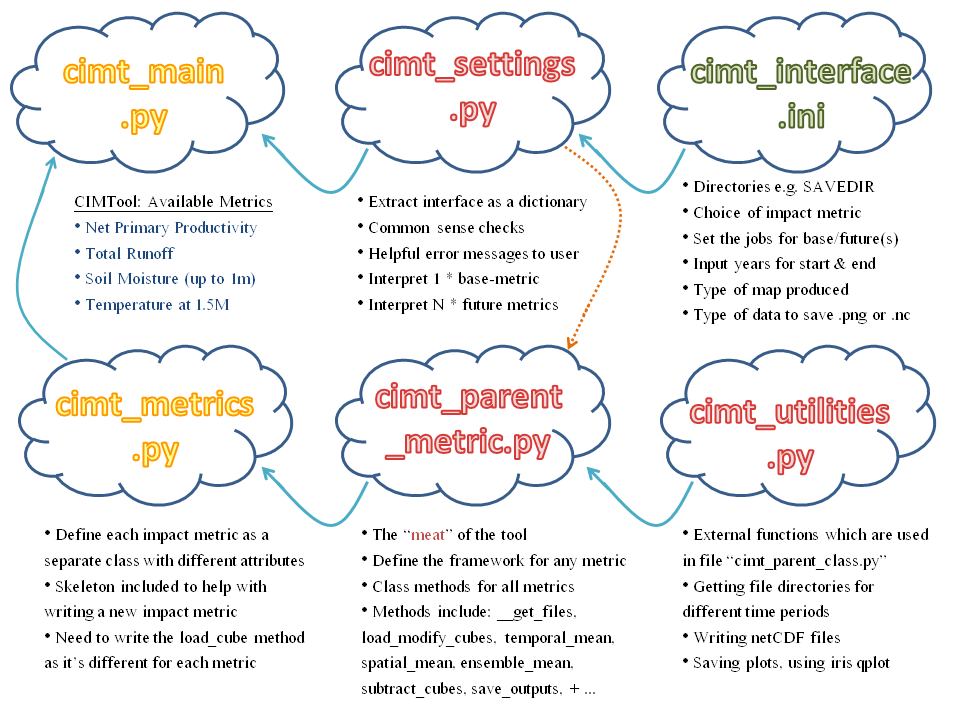

In [1]:
from IPython.display import Image
Image( filename = 'diagrams/metric_mindmap.png' )

### 1.3. A little about the schematic

The prefix *cimt_* at the beginning of the name for each file simply stands for *climate impacts metrics tool*. We can also see that there are five *.py* (python) files and one *.ini* (configuration) file. The colours indicate which files the user will interact with, <font color='green'>green</font> indicating frequent interaction, <font color='orange'>amber</font> meaning infrequent interaction and <font color='red'>red</font> suggesting developer. The user should be able to use the tool by editing the desired parameters in the configuration file and then run the whole tool via $\textrm{cimt_main.py}$. 

Under each cloud are some bullet points and these will be expanded on below, the **Currently Available Metrics** at the top left of the diagram is not specific to $\textrm{cimt_main.py}$, it doesn't have anything to do with it, I just ran out of space!. It is just a simple statement for the user to know what metrics are available to use (at the time of writing). There might be parts throughout this tutorial where I am demonstrating the use of a particular method (for example, getting the metrics available) which requires some good knowledge of this flow structure between files. So feel free to come back to this image if it ever becomes confusing and you should be able to see the logic.

The <font color='blue'>blue</font> arrows indicate that the file at the head-end of the arrow is importing the file at the tail-end of the arrow. The dashed <font color='orange'>orange</font> arrow indicates the passing of information which is 'under-the-hood' and should only be of interest to a developer.

### 1.4. What does each file do?

For this part of the tutorial it would be a good idea to open each file separately using an editor like emacs/gedit or your favourite IDE. The files will be introduced in a logical order, starting at the base of each arrow from the diagram (top first, followed by the bottom arrow), which should help highlight how information is passed between each file.

#### 1.4.1. The interface file

The $\textrm{cimt_interface.ini}$ file is essentially a fancy text file where the user can change certain parameters which define what the tool will compute and output. Such parameters are separated into **sections** and these are indicated by the square brackets, e.g. [this_is_a_section]. The interface should have the following sections:

* [environment]
* [settings]
* [base_jobs]
* [future_jobs_1]
* ...
* [future_jobs_n]


The **[environment]** section is where we can provide a full path to where we want to load file directories and save outputs from the tool by editing the variables DATADIR and SAVEDIR. In order to save outputs to a folder named *output* found in DATADIR, we use the following command: SAVEDIR = %(DATADIR)soutput.

Parameters such as the choice of impact metric, map type, output type and period can be found under the section **[settings]**. There are some helpful comments/documentation in the configuration file which help to explain what options are possible along with a simple explanation of what they do. Quite often a valid choice will be *both* which will run both possible options. Possible choices include saving map data as .png or .nc files, subtracting ensemble means or each members within a jobset. More can be understood by reading the comments accompanied with the configuration file.

The default assumption is that we will only be using one *base_jobset* i.e. the control jobset. This is denoted by its own section named **[base_jobs]**, within this section we can edit parameters such as the base_description, base_start/end and individual members. The description is used for naming output files, for example "*RCP26_Base*" would indicate a [RCP2.6 scenario](https://en.wikipedia.org/wiki/Representative_Concentration_Pathways) as our base simulation. Our base_start and base_end are the years we want to consider for the simulation. Each job member will be given a job ID from UM job names which requires some user knowledge of the files they are wishing to load.

We can see that for the future jobsets, it is indeed possible to have more than one. Each one is written as its own section, for example the first one should be called **[future_jobs_1]**. The default assumption is that if we wish to add another future jobset, we must follow logical numbering i.e. the next one must be called **[future_jobs_2]**. The program will do subtractions based on the future jobsets minus the base jobset. The parameters here are analogous to **[base_jobs]**.

#### 1.4.2. The settings file

If we turn out attention to the $\textrm{cimt_settings.py}$ file we can understand how the interface works with the tool. This file uses a module named [ConfigParser](https://docs.python.org/2/library/configparser.html) in order to read in the parameters set by the interface. There are also "*common-sense*" checks (for input parameters) which need to be passed before the tool begins to run. Such checks include passing conditions like: $\textrm{end_year > begin_year}$, acceptable list of strings for period type, etc.

The interface is stored in pythonic language as a dictionary, in an object named **settings_dict**. This can be indexed appropriately to obtain parameters set in the interface. The big advantage of using a dictionary is that we are able to remove specific key-value pairs quickly. The function **without_keys** defined at the top of the file allows us to do this and is used on the dictionaries for **[base_jobs]**, **[future_jobs_1]**, etc.

The for-loop at the bottom of the file should give some insight as to why adding future jobtypes requires logical numbering. There shouldn't be any need to edit the $\textrm{cimt_settings.py}$ on the basis of solely editing parameters and running CIMTool.

#### 1.4.3. The 'main' script (take one)

We will briefly talk about parts of $\textrm{cimt_main.py}$ here, expand on the other files and then finish off the discussion by returning to $\textrm{cimt_main.py}$ (This is to adhere to the arrows in $\textrm{metric_mindmap.png}$). Looking at $\textrm{cimt_main.py}$ we can see that it is a relatively short piece of code, but may look intimidating at first. We can see that there is a lot going on in terms of calling various methods on different instances of classes, the bit we will focus on here is where we can see **cimt_settings.parameter**. What this means is that python (from $\textrm{cimt_main.py}$) will look in a file named $\textrm{cimt_settings}$ for a variable known as *parameter*, and use that variable whatever it may be. The parameters from the interface are used as function/method arguments and so the tool will run based on these changes made from the interface. We will return to $\textrm{cimt_main.py}$ after exploring the other files which explain how metrics are created.


#### 1.4.4. The utilities file

The $\textrm{cimt_utilities.py}$ file is essentially a helper file for $\textrm{cimt_parent_metric.py}$. The $\textrm{cimt_parent_metric.py}$ file is a big file and makes good use of functions to avoid repetition, as such in CIMTool it is appropriate to allocate these functions into a separate file.

Functions in this file include operations that are likely to be looped over, some examples include loading path directories to files, saving map outputs as a .png or .nc file or even reading in .nc files. The functions are accompanied with documentation and so the reader can learn more about the expected arguments, etc. by reading the docstrings associated with each function. There are also some relevant imports at the top of the file which the reader should make themselves aware of.

#### 1.4.5. The parent-metric file

This really is the "meat" of the tool. This file is quite long. Rest assured, a lot of this is documentation encapsulated in [docstrings](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html). This is where the idea of an **Impact Metric** is defined. The first thing we can see are the imports at the top (including cimt_utilities, that should make sense by now). This is followed by defining an Impact Metric as a **class**. The whole point of defining something as a class is if we wish to use the *self* part of an instance of a class within our code. Want to brush up on classes in python? One could explore the [python documentation](https://docs.python.org/2/tutorial/classes.html), or perhaps a [detailed example](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) or even an [interactive example](https://www.learnpython.org/en/Classes_and_Objects).

The first thing we see after declaring the class is the line $\textrm{ __metaclass__ = abc.ABCMeta}$. This sets up the class so that we are able to use something called an [abstract method](https://docs.python.org/2/library/abc.html). We won't worry about this to much, but it's nice to be aware of its existence. You will also see some (you guessed it) documentation, and this will talk about the Impact Metric in general and even give some helpful advice on what parameters are expected for the [constructor](https://stackoverflow.com/questions/8985806/python-constructors-and-init). Let's focus on the constructor... we can see that during the initialisation everything is being set to $\textrm{None}$. This is because the program will never initialise a class named ImpactMetric for running, the Impact Metric (parent-metric) serves as the skeleton for all types of possible metrics to be added. When a new metric is declared (as a class, and covered in the next section) we must remember to indicate [inheritance](http://www.jesshamrick.com/2011/05/18/an-introduction-to-classes-and-inheritance-in-python/) to this parent Impact Metric. Important attributes declared in the constructor are things such as the metrics name, stash number, units, etc. More information about this can be found under the docstring. One can also bring up docstring help in an ipython sessions using $\textrm{help()}$.

The first method is known as something called a [class method](https://stackoverflow.com/questions/12179271/meaning-of-classmethod-and-staticmethod-for-beginner). This tells python that the method is only relevant to the current class in which it is defined, for this example we are looking at the method named $\textrm{available_metrics()}$. As one might expect, calling this method will print to the user what metrics are currently available in the tool. We can call this like so (refer to the arrows between files to help understand what's going on):

In [1]:
import cimt_metrics
cimt_metrics.cimt_parent_metric.ImpactMetric.available_metrics()

ImportError: No module named iris

Why didn't we just import $\textrm{cimt_parent_metric.py}$ and call $\textrm{available_metrics()}$ on the class Impact Metric? Well, we could, but this tutorial is trying to stress the point of running the tool ONLY from $\textrm{cimt_main.py}$ i.e. minimising the number of arrows in $\textrm{metric_mindmap.png}$. All this method does is print to the user what classes are inheriting from this parent-class Impact Metric (i.e. subclasses), therefore indicating what possible metrics could be chosen in the interface file. Just below this we can see use of an abstract method. What this tells python is that we are not going to write code for the method here, however we may want to be able to write this method for any subclasses of the current class. As you can see there is some documentation, input arguments and a $\textrm{return}$ statement which returns nothing. This sets up the method with the flexibility to be different for each metric class inheriting from the parent-class.

After this we see that every method is defined in the normal way, this gives the assumption that every subclass metric will be able to access these methods and they will act similarly, dependant on the *self.variable* assocaited with each instance. I won't go into to much detail talking about the different methods here as there is sufficient documentation associated with each method, later in the tutorial we will be exploring the full capability of these. They will be summarised briefly:

* $\textrm{print_info()}$: Prints basic information to user, used in the tutorial later (Not really used within the tool itself).
* $\textrm{__get_files()}$: Uses a dictionary from interface to load full path to location of cubes for loading.
* $\textrm{load_modify_cubes()}$: Loads data from UM output files for job into an iris cube, note that this loops over the abstract method $\textrm{load_cube()}$.
* $\textrm{temporal_mean()}$: Reduces a cubes dimensions to produce a 2D map, taking a mean over the time dimension.
* $\textrm{spatial_mean()}$: Reduces a cubes dimensions to produce a mean value over the entire domain if time-dimension = 1 or a time-series if time-dimension > 1.
* $\textrm{ensemble_mean()}$: Calculates an ensemble mean for any number of jobs (simulations) in a jobtype, if only one job, the individual cube is retained.
* $\textrm{subtract_cubes()}$: Does what it says on the tin. Subtracts two cubes from each other, under various constraints set in the interface.
* $\textrm{save_outputs()}$: Saves outputs based on constraint set in the interface, i.e. if we want .png maps or .nc data saved.

You might be wondering about some of the input arguments for these methods found in $\textrm{cimt_parent_metric.py}$, don't panic this will be covered later.

#### 1.4.6. The classes file

Here is where we are able to write our very own impact metrics. Writing one is faily simple if we adhere to some basic rules. We can see that each new metric is defined as its own class, inheriting from the parent-class Impact Metric (sound familiar?). At the moment there are only two things to worry about. Initialising the constructor and defining the $\textrm{load_cube()}$ method. I have also been kind enough to provide a template (commented out) at the beginning of the file to outline the structure that every new metric should follow. 

At the time of writing there are three different impact metrics defined, the reader should familiarise themselves with how the parameters have been set up in the constructors and note how the $\textrm{load_cube()}$ method is different between each metric. This method can depend on the metrics stash number, cell numbers, etc. and could involve cube manipulation such as addition. By now it should be pretty clear why these two files are separate, one if for defining all things which are similar between metrics ($\textrm{cimt_parent_metric.py}$) and the other for the differences ($\textrm{cimt_metrics.py}$).

#### 1.4.7. The main file (take two)

So, we find ourselves back at $\textrm{cimt_main.py}$, we should now have some familiarity of what methods are available and how metrics have been setup as classes. This section will serve as a nice transition from me babbling on into some practical usage of CIMTool. This ipython session can be thought of as a special version of $\textrm{cimt_main.py}$. We would normally run $\textrm{cimt_main.py}$ from the command line or an IDE, but here we are going to explore things in more detail.

## 2. Using CIMTool

### 2.1. Running $\textrm{cimt_main.py}$ in an ipython session

We are going to replicate parts of $\textrm{cimt_main.py}$ in the current ipython session but go into some detail about what is happening at each step, and understand some of the optional input arguments for methods associated with each metric.

**IMPORTANT**: In order to ensure that you will be able to load data successfully, regardless if you have any saved CIMTool is accompanied with some sample data. It iis therefore advisable to edit the $\textrm{cimt_interface.ini}$ so that it is **exactly** identical to the file $\textrm{cimt_sample_interface.ini}$, found in the folder $\textrm{sample_data}$.

* The general settings parameters should be using $\textrm{impact_metric = NPP}$, $\textrm{period = ['ann']}$, etc.
* There should be a base jobset with two ensemble members, $\textrm{kaadc}$ and $\textrm{kaaec}$.
* There should be a future jobset with two ensemble members, $\textrm{apdib}$ and $\textrm{apdic}$.

#### 2.1.1. Setting up the environment and initialising metrics

First of all let's setup the environment by importing the necessary files, how many will this be? Check the $\textrm{metric_mindmap.png}$ if you are unsure. Well, the answer is two, because of those files importing the other files already, let's focus on the first few lines.

In [3]:
import cimt_settings
import cimt_metrics

# Get the impact metric
ImpactMetric = getattr( cimt_metrics , cimt_settings.impact_metric )

# Example of initialising base metric
BaseMetric = ImpactMetric()

Here we have imported the two files needed in order to run the tool. The next line checks what the user input for the impact metric is (for example $\textrm{NPP}$), and checks in the file $\textrm{cimt_metrics.py}$ for a class with this name. If one exists then an initialisation of such a metric is stored in the object variable $\textrm{BaseMetric}$. Let's print the object $\textrm{BaseMetric}$, we will see that it is declared as an NPP class object and occupies some memory (indicated by the jargon on the RHS).

In [4]:
print BaseMetric

This doesn't tell us too much information about the metric itself, what about the attributes which are initiated via the constructor, surely they should exist somewhere and we should be able to access them? They do. Individual attributes can be accessed by typing commands such as $\textrm{metric.name}$ or $\textrm{metric.stash}$. However, there exists a method which is written to print out three of these attributes in a nice format. Let's call that method to see some of these attributes:

In [5]:
# Printing some information about metric to user
BaseMetric.print_info()

Metric name: Net_Primary_Productivity
Stash number: m01s03i262
Metric units: kg m^2 yr


#### 2.1.2. Loading and modifying cubes

Now we are in a position to start loading, modifying and appending cubes to our metrics. The method $\textrm{load_modify_cubes()}$ does this. This method has two arguments. The first option is a simple boolean, an indication of the $\textrm{BaseMetric}$. Since we usually begin with this we can set this to be true, however for all future metrics we leave this empty. The purpose of this is for nice print statements to the user, it doesn't actually affect the end results. The second argument is the period type which is comes from teh interface. This will tell CIMTool what kind of files to be looking for, e.g. apy (annual), aps (seasonal), etc.

If you like, return the code below observe the output, then delete the $\textrm{True}$ argument and re-run, see if you can spot the difference. We see that this method loads the cubes for each job in the jobset with some helpful print statements to let the user know where the program is.

In [6]:
# Load and modify cubes for the base metric, we set base_metric = True
for period_index in cimt_settings.period_list:
    BaseMetric.load_modify_cubes( base_run = True , period = period_index )
print 'Finished'

Preparing to load cubes for Base Metric: RCP2.6_PD
Loading Cube: NPP_(2010-2011)_kaadc_ann
Loading Cube: NPP_(2010-2011)_kaaec_ann
Finished


So the method has loaded some cubes, how do we access these if we wanted to? They are stored as an object which can be called via $\textrm{metric.cubes}$ where $\textrm{metric}$ is $\textrm{BaseMetric}$ in this case. Based on the output above, how would we return the cube information corresponding to the job $\textrm{kaaec}$ ? (Hint: indexing starts from 0).

In [7]:
print BaseMetric.cubes[1]

NPP_(2010-2011)_kaaec_ann / (kg m^2 yr) (time: 2; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                               x            -               -
          latitude                           -            x               -
          longitude                          -            -               x
     Auxiliary coordinates:
          forecast_period                    x            -               -
          year                               x            -               -
     Scalar coordinates:
          forecast_reference_time: 1859-01-01 00:00:00
     Attributes:
          Created by: Climate Impacts Metrics Tool
          Source: Data from Met Office Unified Model
          Stash Number: m01s03i262


What's this at the bottom under attributes? This is updated at some point when calling the method $\textrm{load_modify_cubes()}$, have a look at the method in $\textrm{cimt_parent_metric.load_modify_cubes()}$ and see if you can find where this happens. We also see that the cube name includes the start/end years and the type of impact metric it is. See if you can understand how the method updates the naming of these cubes. It's important to really understand one feature of this method, and that is when we call the abstract method $\textrm{load_cube()}$. Locate where this happens in the code. You should find a line like this: $\textrm{cube = self.load_cube( job )}$. This is where we call on a method which will act differently depending on the impact metric chosen. These variants are defined as overwritten methods in $\textrm{cimt_classes.py}$.

#### 2.1.3. Creating a temporal mean for each job

If we take a quick look at the output above we see that our cubes typically have three co-ordinate dimensions: $\textrm{time}$, $\textrm{latitude}$ and $\textrm{longitude}$. We must modify these cubes somehow in order to be able to plot something useful (like a map). There exists a method named $\textrm{temporal_mean()}$ which reduces a cubes dimensions to produce a 2D map (taking a mean over the time-dimension). This method has an optional argument. This argument is an option for use if the user knows more about the input cubes they are wishing to take a temporal mean of. The default settings is that $\textrm{input_cubes = None}$, from this CIMTool looks for an object named $\textrm{self.cubes}$ i.e. the output cubes saved from calling $\textrm{load_modify_cubes()}$.
Running CIMTool in the command line will execute this method with $\textrm{input_cubes = None}$. Its sole existence is for the user to have the option to use this method as a function on any input cubes (if they so desire). Note that the time-average is taken over each cube (job) provided, i.e. found in $\textrm{self.cubes}$ or the argument cubes provided.

Note: Inside this method CIMTool uses options from the interface to save cubes into an internal object known as $\textrm{metric.cubes_to_output}$. This is used later on for saving plots, and at this point it will append cubes if the user has selected $\textrm{pre-subtraction}$. Think about why this is.

In [8]:
BaseMetric.temporal_mean()

/opt/ukmo/iris/default/linux64/site-packages/iris/coords.py:987: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'year'.
  warnings.warn(msg.format(self.name()))


[<iris 'Cube' of NPP_(2010-2011)_kaadc_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>,
 <iris 'Cube' of NPP_(2010-2011)_kaaec_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>]

We have some new cubes, you're right if you think that they will be stored in a new object. The cubes can be called via $\textrm{metric.maps}$. Didn't I just say that there's a possibility they were being appended into an object called $\textrm{metric.cubes_to_output}$? That's correct, however $\textrm{metric.maps}$ will always return the cubes computed from calling this method, $\textrm{metric.cubes_to_output}$ will only return the cubes which have been selected for saving outputs (based on user choices).

#### 2.1.4. (Advanced) Investigating a spatial-mean and exploring argument cubes

We have access to a similar method which will reduce a cubes dimensions to produce a mean value over the entire domain (if the time dimension = 1), or a time-series (if the time dimension > 1), i.e. take an area-weighted mean over the latitude/longitude dimensions. Such a method is named $\textrm{spatial_mean()}$. There is a slight difference between this and the time-averaging counterpart, the tool assumes that we are wanting to automatically save outputs for creating maps, i.e. when calling $\textrm{temporal_mean()}$. At the current stage there is no interest in automated saving of spatial means. There is however a similar optional argument with the default setting $\textrm{input_cubes = None}$. Like before, if left empty the method will look for an object named $\textrm{self.cubes}$ and do computations based on those cubes as the argument. Let's demonstrate use of inputting our own argument cubes.

We will access the cubes from $\textrm{self.cubes}$ and apply some operations so that they now differ to when originally loaded, we will then call the method with our modified cubes as the argument and compare to when we call the method as normal. After calling $\textrm{SpatialMean()}$ the computed cubes can be accessed via $\textrm{metric.time_series}$. It is therefore these cubes that we will plot for the purposes of demonstration. First let's use [iris quickplot](http://scitools.org.uk/iris/docs/v1.9.0/html/iris/iris/quickplot.html), on the default version of $\textrm{spatial_mean()}$.

**IMPORTANT**: The plots below will not be very impressive if we are using the sample data since we only use two-years, and hence a time-series with only two data points is not very much. But we are using this for visual demonstration only.

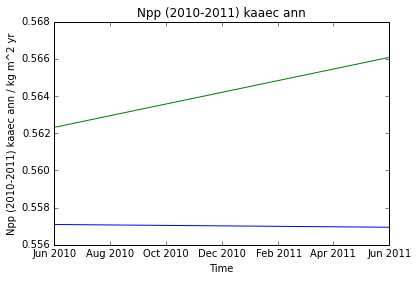

In [9]:
import iris.quickplot as qplt

BaseMetric.spatial_mean() # Call method with default setting, i.e. input_cubes = None.

for cube in range( len( BaseMetric.time_series ) ):
    qplt.plot( BaseMetric.time_series[cube] ) # Plot the each cube

The above cubes are plotted by iterating over the object $\textrm{metric.time_series}$, let's now do some modifications and use the method to do a similar operation based on our choice of input cubes. For simplicity the example multiples the cubes by two and shifts one ensemble slightly higher for visual effect. Do not worry about labelling/axis it's not important for the purpose of this example. Note that calling the method $\textrm{spatial_mean()}$ on the same metric will overwrite the cubes saved in $\textrm{metric.time_series}$. So we only need iterate over this object again for plotting.

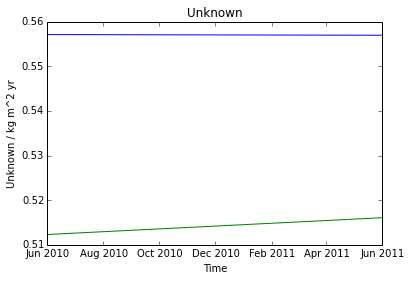

In [10]:
new_cubes = [] # Define empty list for new cubes

for cube in range( len( BaseMetric.cubes ) ): # Do some cube manipulation to get different cubes 
    if cube == 1:
        new_cubes.append( BaseMetric.cubes[cube] - 0.05 ) # Apply shift to one cube
    else: 
        new_cubes.append( BaseMetric.cubes[cube] ) # Do nothing
     
BaseMetric.spatial_mean( new_cubes ) # Call method with our new cubes as the argument

for cube in range( len( BaseMetric.time_series ) ):
    qplt.plot( BaseMetric.time_series[cube] ) # Plot the each cube  

The same can be done for the previous method $\textrm{temporal_mean()}$, however on the basis of solely changing parameters in the interface and running $\textrm{im_main.py}$, this won't be touched. Therefore this will only be of use to someone who knows the tool well and has some prior knowledge of the input cubes they wish to analyse; I have simply provided the tools required to do so.

#### 2.1.5. Creating an ensemble-mean (if joblist contains more than one job)

Sometimes we may want to look out the output of each individual job, other times one might like to take an average of such jobs and so there exists a method named $\textrm{ensemble_mean()}$. This method will calculate a simple ensemble-mean for any number of jobs  in a jobset and writes them to an object (similar as previous methods), and can be accessed via $\textrm{metric.ensemble_mean}$. However what if we have two jobsets, one contains four ensembles and the other just has the one job. What will happen as $\textrm{ensemble_mean()}$ is called on each jobset? If there is only one job, the $\textrm{self.ensemble_mean}$ object is still created but with the original data of the single input cube. Let's go ahead and demonstrate this by example. We will need to do some modifications to get an object which contains only one cube without changing parameters in the interface. This example will use the cubes generated from $\textrm{temporal_mean()}$ which can be accessed via $\textrm{metric.maps}$.

In [11]:
BaseMetric.maps

[<iris 'Cube' of NPP_(2010-2011)_kaadc_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>,
 <iris 'Cube' of NPP_(2010-2011)_kaaec_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>]

The above line is just a reminder as to what the object $\textrm{BaseMetric.maps}$ contains, we have two cubes (jobs) with a reduced time-domain. Ok, great let's take the ensemble mean.

In [12]:
BaseMetric.ensemble_mean()

<iris 'Cube' of NPP_(2010-2011)_Ensemble_Mean_RCP2.6_PD_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>

Let's return the output by calling the internaly saved object.

In [13]:
BaseMetric.ens_mean

<iris 'Cube' of NPP_(2010-2011)_Ensemble_Mean_RCP2.6_PD_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>

As expected we are returned with one cube which has been appropiately named and saved in the object $\textrm{metric.ens_mean}$. What if we pass an argument with only one cube (job)? Well we can use what we just learned about optional argument cubes and call $\textrm{ensemble_mean()}$ with our own input.

In [14]:
single_cube = [BaseMetric.maps[0]]  # We must put cube into a list as this is how program interprets input cubes
BaseMetric.ensemble_mean( single_cube )

<iris 'Cube' of NPP_(2010-2011)_kaadc_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>

Ta-da, we see that the original cube is preserved and no harm-done, in this example I had to define $\textrm{single_cube}$ as a list even though there is only one cube. This is how the program will always interpret input cubes (even if there is only one, it will always be in a list). The user needn't worry about this when editing jobs in the interface. Note however that this will overwrite the current $\textrm{metric.ens_mean}$ object, for the purpose of the tutorial we want an ensemble of the two jobs. Therefore we will run the previous command so that $\textrm{metric.ens_mean}$ is overwritten with the desired cube.

In [15]:
BaseMetric.ensemble_mean()

<iris 'Cube' of NPP_(2010-2011)_Ensemble_Mean_RCP2.6_PD_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>

#### 2.1.6. Applying operations to future metrics

So we really went into some detail about how these different methods work, now we will sit back and look at what $\textrm{cimt_main.py}$ does in the background for every future metric. Note that we put this in a nested loop over the number of future jobsets and the number of periods. However both if these index's are one. Make sure you understand why this is. We can then initialise a metric followed by calling the methods we used before.

In [16]:
for period_index in cimt_settings.period_list:
    for instance_index in range( cimt_settings.number_of_future_jobsets ):
        FutureMetric = ImpactMetric()
        FutureMetric.load_modify_cubes( base_run = False , period = period_index , instance = instance_index )
        FutureMetric.temporal_mean()
        FutureMetric.ensemble_mean()

Preparing to load cubes for Future Metric: RCP2.6SRM_90s
Loading Cube: NPP_(2090-2091)_apdib_ann
Loading Cube: NPP_(2090-2091)_apdic_ann


In a few lines we are doing all of what we went through in detail for the base metric, but for an arbitrary number of future metrics. This is a nice example of how powerful object-oriented programming can be. Now though, we will lok at some methods used which require a metric as an input argument.

#### 2.1.7. Subtracting cubes

We now turn our attention to the method known as $\textrm{subtract_cubes()}$. As one might imagine this method will subtract two cubes from each other, however simple this may sound there are a few input arguments to be aware of which constrain what kind of subtractions we so desire. For example we may want to subtract the ensemble-means between our base and future metrics, or the individual members from each other. The following line will load up a diagram that has been created to help visualise this. In the case that the following line doesn't load the image, simply open $\textrm{cube_subtraction.png}$ some other way.

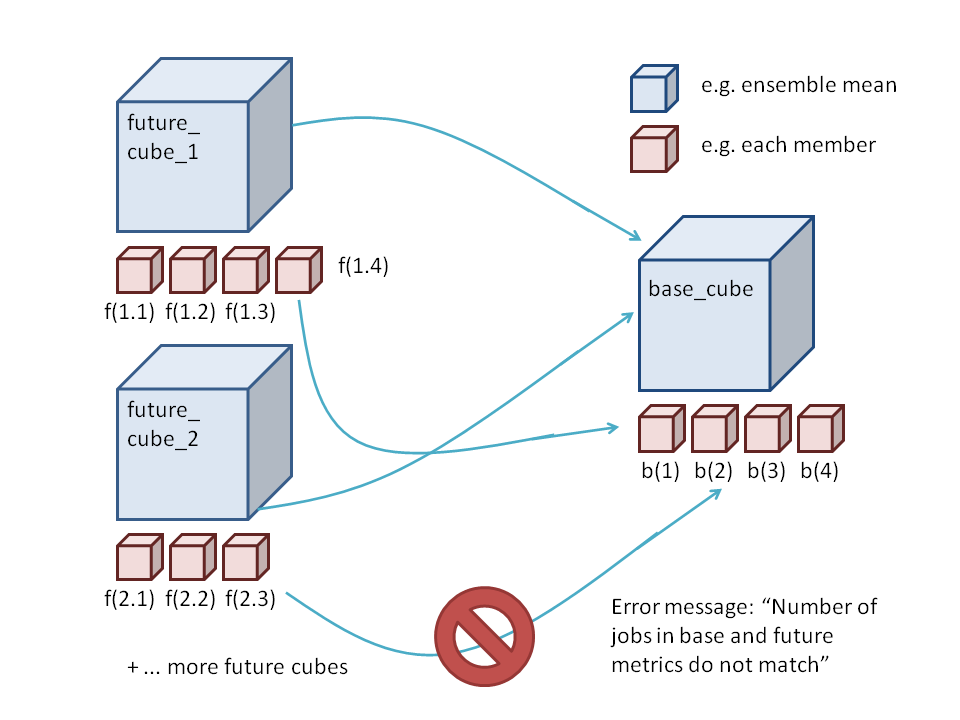

In [17]:
from IPython.display import Image
Image( filename = 'diagrams/cube_subtraction.png' )

From the diagram we see that it is possible to subtract either individual member cubes or ensemble-means between base and future cubes. The program iterates through the number of future metrics and computes subtractions with the base metric as an input argument. Note: if the number of jobs in a future jobset does not match the number of jobs in the base jobset the subtractions will not be carried out and an error will be produced. What better way to see this than via an example. Similar to previous methods, the computed cubes will be saved into an object, this time named $\textrm{metric.subtracted_cubes}$, and there are method arguments which will tell the program which cubes to save for outputting i.e. into the object $\textrm{metric.cubes_to_output}$. Let's do subtractions which will produce an error i.e. when future and base joblists have a different number of jobs. We will have to do some cube manipulation again. We are going to reduce the number of cubes in a future metrics $\textrm{metric.maps}$ object and then try to do subtractions relative to a base metric where its $\textrm{metric.maps}$ are unchanged i.e. has two members.

In [18]:
FutureMetric.temporal_mean() # In case user runs this block twice
FutureMetric.maps = [ FutureMetric.maps[0] ] # Need to put into type list

FutureMetric.subtract_cubes( BaseMetric ) # Attempt to do subtractions

StandardError: Number of jobs in base and future metrics don't match

Here we are presented with an error statement which tells us that the number of cubes in the base and future metrics do not match. This might likely crop up if the user doesn't pay much attention when setting the jobs in the interface. Let's revert these changes so that subtractions will be carried out.

In [19]:
FutureMetric.temporal_mean()

[<iris 'Cube' of NPP_(2090-2091)_apdib_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>,
 <iris 'Cube' of NPP_(2090-2091)_apdic_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>]

Let's do the subtractions without changing the cubes already saved in the metrics, and view the subtracted cubes for one of the future metrics. Note that the subtracted metrics are saved into an object that is called via the future metric itself, i.e. $\textrm{future_metric_1.subtracted_cubes}$ will return the subtracted cubes.

In [20]:
FutureMetric.subtract_cubes( BaseMetric )

[<iris 'Cube' of NPP_(2090-2091)_[apdib-kaadc]_(2010-2011)_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>,
 <iris 'Cube' of NPP_(2090-2091)_[apdic-kaaec]_(2010-2011)_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>,
 <iris 'Cube' of NPP_(2090-2091)_[RCP2.6SRM_90s-RCP2.6_PD]_(2010-2011)_ann / (kg m^2 yr) (latitude: 145; longitude: 192)>]

Here we can see view all the possible subtractions between the cubes in base and future metrics. The object $\textrm{FutureMetric.cubes_to_output}$ will save the cubes for output indicated by the user input $\textrm{subtraction_type}$, i.e. (ensemble-mean subtraction or each member subtraction, or both!). 

#### 2.1.8. Saving outputs

You may have noticed that I mentioned an object known as $\textrm{metric.cubes_to_output}$ a few times. Indeed each metric will have an object like this and is used solely for the method called $\textrm{save_outputs()}$. There is an optional argument for a metric, this is only used if we are calling the method on a future metric. If we are interested in using CIMTool for simple cases of producing maps of a base metric only, then we should leave these argument empty. You can see how this is coded up in $\textrm{cimt_main.py}$.

#### 2.2. Viewing a map

Here I leave a line of code to let you view a quickplot of a map.

/opt/ukmo/iris/default/linux64/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/ukmo/iris/default/linux64/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/ukmo/iris/default/linux64/site-packages/cartopy/mpl/geoaxes.py:1263: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


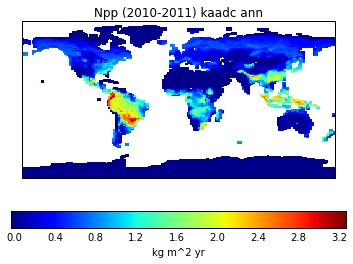

In [22]:
import iris.quickplot as qplt

map_to_view = BaseMetric.maps[0]
qplt.pcolormesh( map_to_view )